# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "apiHW/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    cityname = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city_countrycode = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    city = "{0},{1}".format(cityname, city_countrycode)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


669

In [3]:
pprint(cities)

['marcona,pe',
 'avarua,ck',
 'north bend,us',
 'padang,id',
 'upernavik,gl',
 'san patricio,mx',
 'port alfred,za',
 'qaanaaq,gl',
 'ushuaia,ar',
 'castelo branco,pt',
 'mar del plata,ar',
 'sao sebastiao,br',
 'rikitea,pf',
 'grand gaube,mu',
 'bethel,us',
 'skibbereen,ie',
 'tolaga bay,nz',
 'manicore,br',
 'matai,tz',
 'barentsburg,sj',
 'abadan,ir',
 'punta arenas,cl',
 'butaritari,ki',
 'sitka,us',
 'illoqqortoormiut,gl',
 'lorengau,pg',
 'saleaula,ws',
 'nikolskoye,ru',
 'barrow,us',
 'airai,pw',
 'freetown,ag',
 'mitsamiouli,km',
 'busselton,au',
 'christchurch,nz',
 'fairbanks,us',
 'hithadhoo,mv',
 'castro,cl',
 'wahran,dz',
 'peniche,pt',
 'bongandanga,cd',
 'vaini,to',
 'bluff,nz',
 'puerto ayora,ec',
 'marawi,sd',
 'erzin,ru',
 'havre,us',
 'lebu,cl',
 'the pas,ca',
 'biak,id',
 'vao,nc',
 'yellowknife,ca',
 'belushya guba,ru',
 'clarksburg,us',
 'bereda,so',
 'nadvoitsy,ru',
 'dhidhdhoo,mv',
 'albany,au',
 'talaya,ru',
 'victoria,sc',
 'pisco,pe',
 'hilo,us',
 'the valley

In [4]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
len(lats)

1500

In [5]:
cities = cities[:800]
cities

['marcona,pe',
 'avarua,ck',
 'north bend,us',
 'padang,id',
 'upernavik,gl',
 'san patricio,mx',
 'port alfred,za',
 'qaanaaq,gl',
 'ushuaia,ar',
 'castelo branco,pt',
 'mar del plata,ar',
 'sao sebastiao,br',
 'rikitea,pf',
 'grand gaube,mu',
 'bethel,us',
 'skibbereen,ie',
 'tolaga bay,nz',
 'manicore,br',
 'matai,tz',
 'barentsburg,sj',
 'abadan,ir',
 'punta arenas,cl',
 'butaritari,ki',
 'sitka,us',
 'illoqqortoormiut,gl',
 'lorengau,pg',
 'saleaula,ws',
 'nikolskoye,ru',
 'barrow,us',
 'airai,pw',
 'freetown,ag',
 'mitsamiouli,km',
 'busselton,au',
 'christchurch,nz',
 'fairbanks,us',
 'hithadhoo,mv',
 'castro,cl',
 'wahran,dz',
 'peniche,pt',
 'bongandanga,cd',
 'vaini,to',
 'bluff,nz',
 'puerto ayora,ec',
 'marawi,sd',
 'erzin,ru',
 'havre,us',
 'lebu,cl',
 'the pas,ca',
 'biak,id',
 'vao,nc',
 'yellowknife,ca',
 'belushya guba,ru',
 'clarksburg,us',
 'bereda,so',
 'nadvoitsy,ru',
 'dhidhdhoo,mv',
 'albany,au',
 'talaya,ru',
 'victoria,sc',
 'pisco,pe',
 'hilo,us',
 'the valley

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
city = cities[3]
city


'padang,id'

In [7]:
# api url
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build partial query URL
query_url = f"{url}appid={api_key}&q={city}"
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=e4325d31b66aece614fd5744fd81965e&q=padang,id'

In [8]:
# dictionaries...
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

In [9]:
 url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={api_key}&q={city}"

response = requests.get(query_url + city).json()

pprint(response)

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -0.92, 'lon': 100.36},
 'dt': 1547921750,
 'id': 1633419,
 'main': {'grnd_level': 1017.86,
          'humidity': 100,
          'pressure': 1017.86,
          'sea_level': 1023.2,
          'temp': 299.783,
          'temp_max': 299.783,
          'temp_min': 299.783},
 'name': 'Padang',
 'rain': {'3h': 6.1475},
 'sys': {'country': 'ID',
         'message': 0.0109,
         'sunrise': 1547853861,
         'sunset': 1547897659},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 328.001, 'speed': 2.41}}


In [21]:
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"

    query_url = f"{url}appid={api_key}&q={city}"

    response = requests.get(query_url + city).json()

    City.append(city.split(",")[0])
    try:
        Cloudiness.append(response['weather'][0]['main'])
    except:
        Cloudiness.append("NA")
    
    Country.append(city.split(",")[1])
    
    try:
        Date.append(response['dt'])
    except:
        Date.append("NA")
    
    try:
        Humidity.append(response['main']['humidity'])
    except:
        Humidity.append("NA")
        
    try:
        Lat.append(response['coord']['lat'])
    except:
        Lat.append("NA")
    
    
    try:
        Lng.append(response['coord']['lon'])
    except:
        Lng.append("NA")
    
    try:
        MaxTemp.append(response['main']['temp_max'])
    except:
        MaxTemp.append("NA")
    
    try:
        WindSpeed.append(response['wind']['speed'])
    except:
        WindSpeed.append("NA")
    

In [22]:
WeatherDict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": MaxTemp,
    "Wind Speed": WindSpeed
}


WeatherDict

{'City': ['marcona',
  'avarua',
  'north bend',
  'padang',
  'upernavik',
  'san patricio',
  'port alfred',
  'qaanaaq',
  'ushuaia',
  'castelo branco',
  'mar del plata',
  'sao sebastiao',
  'rikitea',
  'grand gaube',
  'bethel',
  'skibbereen',
  'tolaga bay',
  'manicore',
  'matai',
  'barentsburg',
  'abadan',
  'punta arenas',
  'butaritari',
  'sitka',
  'illoqqortoormiut',
  'lorengau',
  'saleaula',
  'nikolskoye',
  'barrow',
  'airai',
  'freetown',
  'mitsamiouli',
  'busselton',
  'christchurch',
  'fairbanks',
  'hithadhoo',
  'castro',
  'wahran',
  'peniche',
  'bongandanga',
  'vaini',
  'bluff',
  'puerto ayora',
  'marawi',
  'erzin',
  'havre',
  'lebu',
  'the pas',
  'biak',
  'vao',
  'yellowknife',
  'belushya guba',
  'clarksburg',
  'bereda',
  'nadvoitsy',
  'dhidhdhoo',
  'albany',
  'talaya',
  'victoria',
  'pisco',
  'hilo',
  'the valley',
  'genhe',
  'avera',
  'bhawana',
  'waingapu',
  'belmonte',
  'carnarvon',
  'sarangani',
  'clyde river',


In [23]:
Weatherdf = pd.DataFrame(WeatherDict)
Weatherdf.head(30)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,marcona,NA,pe,NA,NA,NA,NA,NA,NA
1,avarua,NA,ck,NA,NA,NA,NA,NA,NA
2,north bend,Clouds,us,1547920560,100,43.41,-124.22,283.75,2.6
3,padang,Rain,id,1547921750,100,-0.92,100.36,299.783,2.41
4,upernavik,NA,gl,NA,NA,NA,NA,NA,NA
5,san patricio,Clouds,mx,1547921751,75,-26.98,-56.83,298.233,2.96
6,port alfred,NA,za,NA,NA,NA,NA,NA,NA
7,qaanaaq,NA,gl,NA,NA,NA,NA,NA,NA
8,ushuaia,Clouds,ar,1547917200,62,-54.81,-68.31,286.15,13.9
9,castelo branco,Rain,pt,1547921470,100,39.82,-7.5,283.283,2.86


In [24]:
Weatherdf = Weatherdf.replace(to_replace='NA', value=np.nan)
Weatherdf = Weatherdf.dropna(axis=0,how='any')
Weatherdf

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,north bend,Clouds,us,1.547921e+09,100.0,43.41,-124.22,283.750,2.60
3,padang,Rain,id,1.547922e+09,100.0,-0.92,100.36,299.783,2.41
5,san patricio,Clouds,mx,1.547922e+09,75.0,-26.98,-56.83,298.233,2.96
8,ushuaia,Clouds,ar,1.547917e+09,62.0,-54.81,-68.31,286.150,13.90
9,castelo branco,Rain,pt,1.547921e+09,100.0,39.82,-7.50,283.283,2.86
10,mar del plata,Clear,ar,1.547922e+09,23.0,-46.43,-67.52,305.283,9.26
11,sao sebastiao,Rain,br,1.547922e+09,93.0,-3.15,-58.36,299.908,2.46
14,bethel,Clouds,us,1.547921e+09,83.0,60.79,-161.76,258.750,3.10
16,tolaga bay,Clear,nz,1.547922e+09,59.0,-38.37,178.30,294.333,6.16
18,matai,Clouds,tz,1.547917e+09,72.0,-8.30,31.52,293.150,1.21


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
len(Weatherdf)

894

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [15]:
colors = {'Light Sky Blue':'#87CEFA'}

Text(0, 0.5, 'Max Temp')

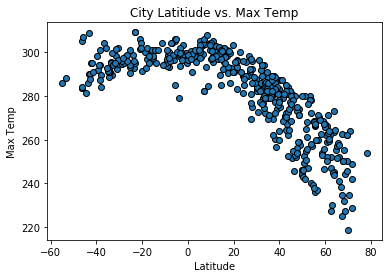

In [16]:
# three scatter plots for each city type
plt.scatter(Weatherdf['Lat'], Weatherdf['Max Temp'], edgecolor = 'black')

#titles & labels
plt.title('City Latitiude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

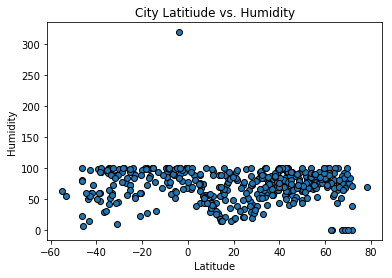

In [17]:
# three scatter plots for each city type
plt.scatter(Weatherdf['Lat'], Weatherdf['Humidity'], edgecolor = 'black')

#titles & labels
plt.title('City Latitiude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

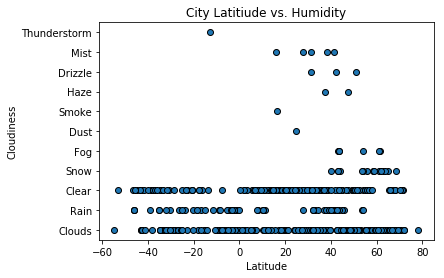

In [18]:
# three scatter plots for each city type
plt.scatter(Weatherdf['Lat'], Weatherdf['Cloudiness'], edgecolor = 'black')

#titles & labels
plt.title('City Latitiude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

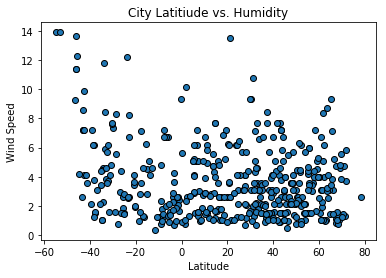

In [19]:
# three scatter plots for each city type
plt.scatter(Weatherdf['Lat'], Weatherdf['Wind Speed'], edgecolor = 'black')

#titles & labels
plt.title('City Latitiude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')